<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/visualizing_geodata_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Geospatial Data

## Setup Dependencies

In [1]:
!git clone https://github.com/martin-fabbri/colab-notebooks.git
# % cd colab-notebooks
# !git pull
# % cd ..

Cloning into 'colab-notebooks'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 679 (delta 43), reused 69 (delta 14), pack-reused 572
Receiving objects: 100% (679/679), 70.29 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (120/120), done.


In [2]:
!sudo apt-get update && apt-get install -y libspatialindex-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubun

In [3]:
!pip install geopandas
!pip install Rtree

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.8MB 10.8MB/s 
     |████████████████████████████████| 10.1MB 40.0MB/s 
     |████████████████████████████████| 522kB 2.9MB/s 
  Created wheel for Rtree: filename=Rtree-0.9.3-cp36-none-any.whl size=21264 sha256=41116505448c89f0c3561e88f5dd4ee741303ac11c26f70e7259ed56f3ec3ccf
  Stored in directory: /root/.cache/pip/wheels/0b/f6/58/2d819b2abdc280c3f70db0b0ce86a712839267957db7abad85
Successfully built Rtree


In [0]:
import json
import warnings
import folium
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from urllib.request import urlopen
from shapely.geometry import Point
from pprint import pprint

warnings.simplefilter(action='ignore', category=FutureWarning)

## Nashville Chicken Permits 

   Unnamed: 0  permit       city  ... date_issued        lat        lng
0           0   288.0  Nashville  ...  11/26/2014  36.029132 -86.724578
1           1   435.0  Nashville  ...  05/18/2015  36.069132 -86.754578
2           2   270.0  Nashville  ...  11/20/2014  36.236134 -86.711204
3           3   249.0  Nashville  ...  12/29/2014  36.246134 -86.751204
4           4   200.0  Nashville  ...  12/10/2014  36.029367 -86.935290

[5 rows x 9 columns]


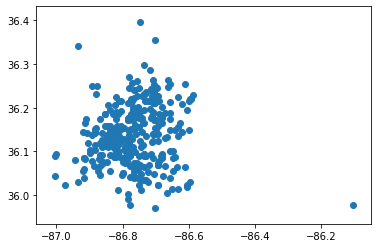

In [0]:
chickens_path = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/domesticated_hen_permits_clean_adjusted_lat_lng.csv'
chickens = pd.read_csv(chickens_path)
print(chickens.head())
plt.scatter(x=chickens.lng, y=chickens.lat);

## NYC Bike Racks

### Loading Neighborhood Boundaries 

In [0]:
nyc_boundaries_url = './colab-notebooks/data/geo_nyc_boundaries.shp'
nyc_boundaries = gpd.read_file(nyc_boundaries_url)

### Exploring NYC neighborhoods

In [0]:
nyc_boundaries.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.187332,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5.0,Staten Island,1.623756e+09,325960.628294,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,3.0,Brooklyn,1.937593e+09,738745.840717,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.045878e+09,904188.424111,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
4,1.0,Manhattan,6.366027e+08,361212.476577,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."


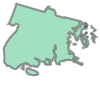

In [0]:
# Bronx
nyc_boundaries.loc[0, 'geometry']

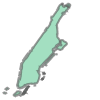

In [0]:
# Manhattan
nyc_boundaries.loc[4, 'geometry']

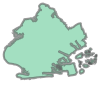

In [0]:
# Brooklyn
nyc_boundaries.loc[2, 'geometry']

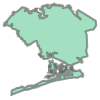

In [0]:
# Queens
nyc_boundaries.loc[3, 'geometry']

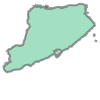

In [0]:
# Staten Island
nyc_boundaries.loc[1, 'geometry']

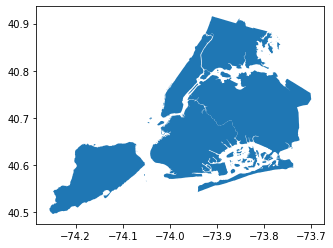

In [0]:
nyc_boundaries.plot();

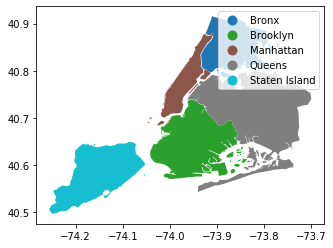

In [0]:
nyc_boundaries.plot(column='boro_name', legend=True);

### Loading Bike Racks Data

In [0]:
# location coordinates data (longitud, latitud)
nyc_bike_racks_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/nyc_bike_racks.json'
bike_racks_longitude = []
bike_racks_latitude = []
with urlopen(nyc_bike_racks_url) as json_file:
  data = json.load(json_file)
  for d in data['data']:
    bike_racks_longitude.append(d[-1])
    bike_racks_latitude.append(d[-2])
    #print(f'Longitud: {d[-1]}')
    #print(f'Latitude: {d[-2]}') 
print(f'Loaded {len(bike_racks_longitude)} bike rack coordinates.')

Loaded 26282 bike rack coordinates.


### Visualize NYC bike rack locations

In [0]:
long = bike_racks_longitude[:10]
lat = bike_racks_latitude[:10] 
print(long)

['-73.97851', '-73.97851', '-73.97851', '-73.978633', '-73.975805', '-73.955151', '-73.955151', '-73.955151', '-73.972513', '-73.995007']


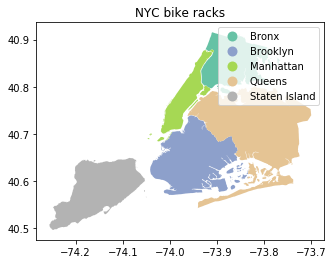

In [0]:
nyc_boundaries.plot(column='boro_name', legend=True, cmap='Set2')
# plt.scatter(long, lat, marker='p', c='darkgreen')
plt.title('NYC bike racks');

## City of Eugene - Neighborhoods 

In [0]:
eug_neighborhoods_url = './colab-notebooks/data/eugene_neighborhoods_hub.shp'
eug_neighborhoods = gpd.read_file(eug_neighborhoods_url)

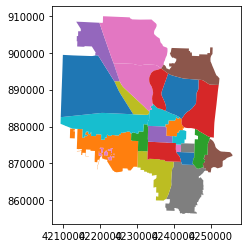

In [0]:
eug_neighborhoods.plot(column='NAME');

In [0]:
eug_neighborhoods['NAME']

0                            Southeast Neighbors
1                   Amazon Neighbors Association
2       Southwest Hills Neighborhood Association
3                                            OUT
4      South University Neighborhood Association
5                        Friendly Area Neighbors
6                    Laurel Hill Valley Citizens
7                      West University Neighbors
8                            Fairmount Neighbors
9                       Churchill Area Neighbors
10                  Jefferson Westside Neighbors
11             Far West Neighborhood Association
12             Downtown Neighborhood Association
13            West Eugene Community Organization
14                   Whiteaker Community Council
15                           Trainsong Neighbors
16                              Harlow Neighbors
17             River Road Community Organization
18                        Active Bethel Citizens
19            Cal Young Neighborhood Association
20    Industrial Cor

## Nashville - Domesticated hen permits

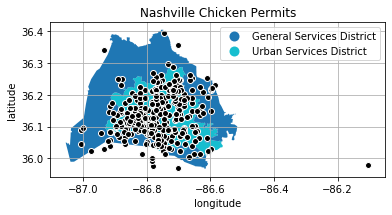

In [0]:
nashville_hen_permits = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/domesticated_hen_permits_clean_adjusted_lat_lng.csv'
nashville_service_districts = './colab-notebooks/data/nashville_service_districts.shp'

nashville_service_districts = gpd.read_file(nashville_service_districts)
nashville_service_districts.plot(column='name', legend=True)

hen_permits_df = pd.read_csv(nashville_hen_permits)
plt.scatter(x=hen_permits_df.lng, y=hen_permits_df.lat, c='black', edgecolor='white')
plt.title('Nashville Chicken Permits')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid();


## Colormaps

When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice.

### Nashville School Districts

In [0]:
school_districts_url = './colab-notebooks/data/school_districts.geojson'
school_districts = gpd.read_file(school_districts_url)
school_districts.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


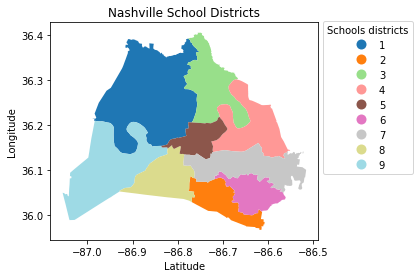

In [0]:
# set leyend style
lgnd_kwds = {'title': 'Schools districts',
             'loc': 'upper left',
             'bbox_to_anchor': (1, 1.03),
             'ncol': 1}

# plot the school districts uding the tab20 colormap (qualitative)
school_districts.plot(column='district', cmap='tab20', legend=True, legend_kwds=lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts');

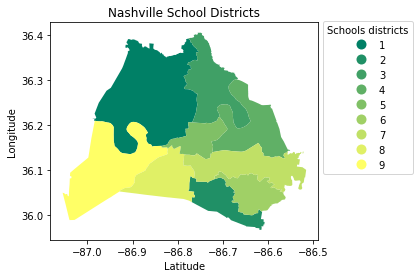

In [0]:
school_districts.plot(column='district', cmap='summer', legend=True, legend_kwds=lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts');

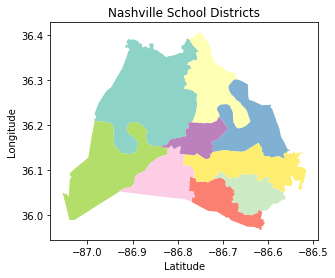

In [0]:
school_districts.plot(cmap='Set3', legend=True, legend_kwds=lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts');

### Nashville Neighborhoods 

In [5]:
neighborhoods_path = './colab-notebooks/data/neighborhoods.geojson' 
neighborhoods = gpd.read_file(neighborhoods_path)
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


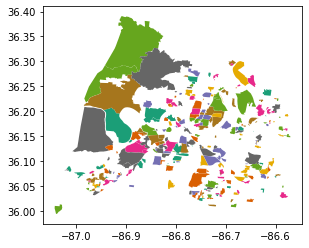

In [6]:
neighborhoods.plot(column = 'name',cmap = 'Dark2');

## Changing coordinate reference systems

In [7]:
nashville_schools_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/schools.csv'
schools = pd.read_csv(nashville_schools_url)
schools['geometry'] = schools.apply(
    lambda x: Point((x.Longitude, x.Latitude)),
    axis=1
)
schools_crs = {'init': 'epsg:4326'}
school_districts = gpd.GeoDataFrame(schools, crs=schools_crs, geometry=schools.geometry)
print(school_districts.head(1))
print(school_districts.crs)

# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg=3857)
print(school_districts.head(1))
print(school_districts.crs)


   School ID  ...                    geometry
0        496  ...  POINT (-86.65885 36.02182)

[1 rows x 17 columns]
{'init': 'epsg:4326'}
   School ID  ...                          geometry
0        496  ...  POINT (-9646818.808 4303623.790)

[1 rows x 17 columns]
{'init': 'epsg:3857', 'no_defs': True}


In [8]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 17 columns):
School ID          170 non-null int64
School Name        170 non-null object
Street Address     170 non-null object
City               170 non-null object
State              170 non-null object
ZIP Code           170 non-null int64
Phone Number       170 non-null object
School State ID    170 non-null int64
School Level       170 non-null object
Lowest Grade       170 non-null object
Highest Grade      170 non-null object
Latitude           170 non-null float64
Longitude          170 non-null float64
School Website     170 non-null object
Cluster            107 non-null object
Mapped Location    170 non-null object
geometry           170 non-null geometry
dtypes: float64(2), geometry(1), int64(3), object(11)
memory usage: 22.7+ KB


In [9]:
art = pd.read_csv('https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/public_art.csv')

print(art.head())
art['geometry'] = art.apply(
    lambda x: Point(float(x.Longitude), float(x.Latitude)),
    axis=1
)
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art.geometry)
art_geo.info()




                             Title  ...        Mapped Location
0          [Cross Country Runners]  ...   (36.12856, -86.8366)
1  [Fourth and Commerce Sculpture]  ...  (36.16234, -86.77774)
2              12th & Porter Mural  ...   (36.1579, -86.78817)
3                A Splash of Color  ...  (36.16202, -86.79975)
4             A Story of Nashville  ...  (36.16215, -86.78205)

[5 rows x 10 columns]
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
Title              132 non-null object
Last Name          132 non-null object
First Name         122 non-null object
Location           131 non-null object
Medium             128 non-null object
Type               132 non-null object
Description        87 non-null object
Latitude           132 non-null float64
Longitude          132 non-null float64
Mapped Location    132 non-null object
geometry           132 non-null geometry
dtypes: float64(2), geometry(1), object(8)
memory usag

## Spatial join practice

Is there a difference between art (point data) that intersects with neighborhoods (polygon data) and art (point data) within neighborhoods (polygon data)? 

In [10]:
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')
art_intersect_neighborhoods.shape

(40, 13)

In [11]:
art_geo.bounds


,minx,miny,maxx,maxy
0,-86.836600,36.128560,-86.836600,36.128560
1,-86.777740,36.162340,-86.777740,36.162340
2,-86.788170,36.157900,-86.788170,36.157900
3,-86.799750,36.162020,-86.799750,36.162020
4,-86.782050,36.162150,-86.782050,36.162150
...,...,...,...,...
127,-86.822209,36.165101,-86.822209,36.165101
128,-86.734450,36.090820,-86.734450,36.090820
129,-86.667770,36.134690,-86.667770,36.134690
130,-86.783820,36.165270,-86.783820,36.165270


In [12]:
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'within')
art_within_neighborhoods.shape

(40, 13)

In [13]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

(0, 13)


In [14]:
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = 'within')
neighborhood_art.head()

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234),41,Urban Residents
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents
21,Chet Atkins,Faxon,Russell,"Corner of Fifth Avenue North and Union Street,...",Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.16466,-86.78102,"(36.16466, -86.78102)",POINT (-86.78102 36.16466),41,Urban Residents
22,Children's Chairs For The Seasons,McGraw,Deloss,"615 Church Street, Nashville TN",Mixed Media - wood and paint,Furniture,chairs depicting the four seasons,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents
34,Foliated Scroll,Bloomer,Kent,"615 Church Street, Nashville TN",Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents


In [15]:
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')
neighborhood_art_grouped.head()

,name,Title
1,Urban Residents,[Fourth and Commerce Sculpture]
4,Urban Residents,A Story of Nashville
21,Urban Residents,Chet Atkins
22,Urban Residents,Children's Chairs For The Seasons
34,Urban Residents,Foliated Scroll
5,Lockeland Springs,Aerial Innovations Mural
30,Lockeland Springs,Eastside Mural
118,Lockeland Springs,Two Musicians
19,Historic Edgefield,Building a Positive Community
20,Sunnyside,Can-Do


In [16]:
neighborhood_art_grouped.agg('count').sort_values(by='Title', ascending=False)

,Title
name,
Urban Residents,22
Lockeland Springs,3
Edgehill (ONE),2
Germantown,2
Hillsboro-West End,2
Inglewood,2
Sunnyside,2
Chestnut Hill (TAG),1
Historic Edgefield,1


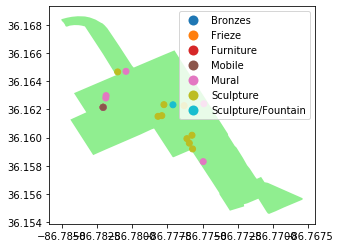

In [17]:
urban_art = neighborhood_art[neighborhood_art.name == 'Urban Residents']
urban_polygon = neighborhoods[neighborhoods.name == 'Urban Residents']
ax = urban_polygon.plot(color='lightgreen')
urban_art.plot(ax=ax, column='Type', legend=True);

## Find the area of the Urban Residents neighborhood

In [18]:
print(urban_polygon.head())
urban_poly_3857 = urban_polygon.to_crs(epsg=3857)
print(urban_poly_3857.head())
area = urban_poly_3857.geometry.area / 10**6
print(area)

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...
41    1.12899
dtype: float64


In [19]:
area[41]

1.1289896057984288

## The center of the Urban Residents neighborhood


<class 'geopandas.geoseries.GeoSeries'>


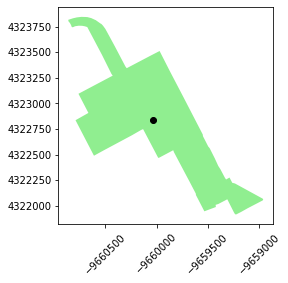

In [20]:
downtown_center = urban_poly_3857.geometry.centroid
print(type(downtown_center))
ax = urban_poly_3857.plot(color='lightgreen')
downtown_center.plot(ax=ax, color='black')
plt.xticks(rotation=45);

## Prepare to calculate distances

In [21]:
art_dist_meters = gpd.GeoDataFrame(art, geometry=art.geometry, crs={'init':'epsg:4326'})
print(art_dist_meters.head(2))

center_point = Point(-9660034.312198792, 4322835.782813124)
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(crs=3857)
print(art_dist_meters.head(2))
art_dist_meters['center'] = center_point


                             Title  ...                    geometry
0          [Cross Country Runners]  ...  POINT (-86.83660 36.12856)
1  [Fourth and Commerce Sculpture]  ...  POINT (-86.77774 36.16234)

[2 rows x 11 columns]
                             Title  ...                          geometry
0          [Cross Country Runners]  ...  POINT (-9666606.094 4318325.479)
1  [Fourth and Commerce Sculpture]  ...  POINT (-9660053.829 4322982.159)

[2 rows x 11 columns]


In [26]:
# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(ctr)

# Pretty print the art_distances
pprint(art_distances)

{'12th & Porter Mural': 1269.1502879119878,
 'A Splash of Color': 2471.774738455904,
 'A Story of Nashville': 513.5632030470281,
 'Aerial Innovations Mural': 4516.755210408422,
 'Airport Sun Project': 12797.594229783645,
 'Andrew Jackson': 948.9812821640502,
 'Angel': 10202.565989739454,
 'Anticipation': 688.8349105273556,
 'April Baby': 4779.394424949201,
 'Arial Triangle [from the Gravity Series]': 4315.322141146862,
 'Ariel': 4380.927773956353,
 'Athena Parthenos': 4294.778095689335,
 'Benedictio': 5313.624214291833,
 'Bicycle Bus-Green Fleet': 468.08286355623386,
 'Blowing Bubbles': 10202.565989739454,
 'Breaking Bread': 1279.2562933101267,
 'Building a Positive Community': 2253.4179974171784,
 'Can-Do': 5648.0863220822475,
 'Chet Atkins': 604.4489448101176,
 "Children's Chairs For The Seasons": 513.5632030470281,
 'Confederate Memorial': 5313.624214291833,
 'Confederate Private Monument': 4316.459103419423,
 'Confluence': 2918.52441210167,
 'Cool Fences': 6491.846030117232,
 'Danc

In [25]:
art_dist_meters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
Title              132 non-null object
Last Name          132 non-null object
First Name         122 non-null object
Location           131 non-null object
Medium             128 non-null object
Type               132 non-null object
Description        87 non-null object
Latitude           132 non-null float64
Longitude          132 non-null float64
Mapped Location    132 non-null object
geometry           132 non-null geometry
center             132 non-null object
dtypes: float64(2), geometry(1), object(9)
memory usage: 12.5+ KB


## Working with Folium

In [31]:
eiffel_tower = folium.Map(location=[48.8583736,2.292226], zoom_start=12)
display(eiffel_tower)

In [43]:
print(urban_polygon.head())
urban_center = (-86.77756457127047, 36.161278209287914)
print(urban_center)
urban_location = [urban_center[1], urban_center[0]]
print(urban_location)
downtown_map = folium.Map(location=urban_location, zoom_start=15)
display(downtown_map)

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
(-86.77756457127047, 36.161278209287914)
[36.161278209287914, -86.77756457127047]


In [45]:
point = (-86.77756457127047, 36.161278209287914)
folium_loc = [point[1], point[0]]
downtown_map = folium.Map(location = folium_loc, zoom_start= 15)
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)
display(downtown_map)


In [48]:
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

for row in urban_art.iterrows():
  row_values = row[1]
  location = [row_values['Latitude'], row_values['Longitude']]
  marker = folium.Marker(location = location)
  marker.add_to(downtown_map)

display(downtown_map)

first part:  1
second part:  Title                  [Fourth and Commerce Sculpture]
Last Name                                       Walker
First Name                                         Lin
Location             333 Commerce Street, Nashville TN
Medium                                             NaN
Type                                         Sculpture
Description                                        NaN
Latitude                                       36.1623
Longitude                                     -86.7777
Mapped Location                  (36.16234, -86.77774)
geometry           POINT (-86.77774000000001 36.16234)
index_right                                         41
name                                   Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name                                                      Gr

In [53]:
print(urban_art.Title)

#Print the urban_art descriptions
print(urban_art.Description)

# Replace Nan and ' values in description
urban_art.Description.fillna('', inplace = True)
urban_art.Description = urban_art.Description.str.replace("'", "`")

#Print the urban_art descriptions again
print(urban_art.Description)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
nashville = [36.16127820928791, -86.77756457127047]
downtown_map = folium.Map(location=nashville, zoom_start=15)
folium.GeoJson(urban_polygon).add_to(downtown_map)
for row in urban_art.iterrows():
  row_values = row[1]

display(downtown_map)

In [73]:
downtown_map = folium.Map(location=nashville, zoom_start=15)
folium.GeoJson(urban_polygon).add_to(downtown_map)
for row in urban_art.iterrows():
  row_values = row[1]
  location = [row_values['Latitude'], row_values['Longitude']]
  popup_text = (str(row_values['Title']) + ':' + str(row_values['Description'])).replace("'","")
  title = str(row_values['Title'])
  popup = f'<i>{title}</i>'
  print(popup)
  marker = folium.Marker(location=location, popup=popup)
  marker.add_to(downtown_map)
display(downtown_map)

<i>[Fourth and Commerce Sculpture]</i>
<i>A Story of Nashville</i>
<i>Chet Atkins</i>
<i>Children's Chairs For The Seasons</i>
<i>Foliated Scroll</i>
<i>Gone Fishing</i>
<i>Happy Times at The Arcade</i>
<i>Johnny Cash Mural</i>
<i>La Storia della Terra</i>
<i>Les Paul Guitar Mural</i>
<i>Library Doors</i>
<i>Lightning Wire Fountain</i>
<i>Nashville, A History through Maps and Aerial Views</i>
<i>Oh, Roy</i>
<i>Orpheus and Eurydice</i>
<i>Piecing It All Together</i>
<i>The Birth of Apollo</i>
<i>The Flutist</i>
<i>The Prince</i>
<i>The Recording Angel</i>
<i>Thomas Gleen Ryman</i>
<i>Timeless</i>
